In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path

In [3]:
# read in csv file
csv_file_path = Path("survey_data.csv")
input_data = pd.read_csv(csv_file_path)

#### Mental Health Constructs (non-clinical)
Create three new variables that each combine three questions to create a "feelings of depression" construct, "inattentiveness construct", and a "validation seeking" construct. The maimum score for each of these constructs is 15. These constructs will allow us to explore overall mental health based on self-reported tendencies of survey participants.

In [50]:
import csv

# Define the input and output file paths
input_file_path = "survey_data.csv"
output_file_path = "survey_data_cleaned.csv"

# Define the column indices for the existing variables
feel_depressed_index = 27
interest_in_daily_activ_index = 28
bothered_by_worries_index = 22
how_easily_distracted_index = 21
difficult_to_concentrate_index = 23
how_often_distracted_by_sm_index = 19
compare_self_to_others_index = 24
feel_about_comparisons_index = 25
seek_validation_index = 26

# Open the input CSV file and create a new CSV file for writing
with open(input_file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)

    # Skip the header row
    header = next(csv_reader)

    # Write the header rows to the output file
    header.append('depression_construct')
    header.append('inattentive_construct')
    header.append('valid_seek_construct')
    csv_writer.writerow(header)

    row_count = 0

    # Iterate over each row in the input CSV file
    for row in csv_reader:
        row_count += 1
        try:
            # Print row data for debugging
            print(f"Processing row {row_count}: {row}")

            # Calculate the composite scores based on the existing variables and make them into integers
            feel_depressed = int(row[feel_depressed_index])
            interest_in_daily_activ = int(row[interest_in_daily_activ_index])
            bothered_by_worries = int(row[bothered_by_worries_index])
            depression_construct = feel_depressed + interest_in_daily_activ + bothered_by_worries

            how_easily_distracted = int(row[how_easily_distracted_index])
            difficult_to_concentrate = int(row[difficult_to_concentrate_index])
            how_often_distracted_by_sm = int(row[how_often_distracted_by_sm_index])
            inattentive_construct = how_easily_distracted + difficult_to_concentrate + how_often_distracted_by_sm

            compare_self_to_others = int(row[compare_self_to_others_index])
            feel_about_comparisons = int(row[feel_about_comparisons_index])
            seek_validation = int(row[seek_validation_index])
            valid_seek_construct = compare_self_to_others + feel_about_comparisons + seek_validation

            # Add the composite score to the current row
            row.append(depression_construct)
            row.append(inattentive_construct)
            row.append(valid_seek_construct)

            # Write the updated row to the output file
            csv_writer.writerow(row)
        except ValueError as e:
            print(f"Error processing row {row_count}: {e}. Skipping row.")

    print(f"Total rows processed: {row_count}")

Processing row 1: ['1', '4/18/2022 19:18', '21', 'Male', 'In a relationship', 'University Student', 'University', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Between 2 and 3 hours', '5', '3', '2', '5', '2', '5', '2', '3', '2', '5', '4', '5']
Processing row 2: ['2', '4/18/2022 19:19', '21', 'Female', 'Single', 'University Student', 'University', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'More than 5 hours', '4', '3', '2', '4', '5', '4', '5', '1', '1', '5', '4', '5']
Processing row 3: ['3', '4/18/2022 19:25', '21', 'Female', 'Single', 'University Student', 'University', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Between 3 and 4 hours', '3', '2', '1', '2', '5', '4', '3', '3', '1', '4', '2', '5']
Processing row 4: ['4', '4/18/2022 19:29', '21', 'Female', 'Single', 'University Student', 'University', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'More than 5 hours', '4', '2', '1', '3', '5', '3', '5', '1

In [51]:
import csv
# read in csv file
csv_file_path = Path("survey_data_cleaned.csv")
clean_data_df = pd.read_csv(csv_file_path)
clean_data_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues,depression_construct,inattentive_construct,valid_seek_construct
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,5,2,3,2,5,4,5,11,13,7
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,4,5,1,1,5,4,5,14,11,7
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,3,3,1,4,2,5,11,8,7
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,3,5,1,2,4,3,2,12,8,8
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,5,3,3,3,4,4,1,13,14,9


In [52]:
# Replace the bin labels using a dictionary to make hours into integer ranges
clean_data_df['avg_time_per_day'] = clean_data_df['avg_time_per_day'].replace({
               "Less than an Hour": '0-1',
               "Between 1 and 2 hours": '1-2',
               "Between 2 and 3 hours": '2-3', "Between 3 and 4 hours": '3-4',
               "Between 4 and 5 hours":'4-5', "More than 5 hours": '>5'})

# Reorder the DataFrame based on the 'avg_time_per_day' column
clean_data_df= clean_data_df.sort_values('avg_time_per_day')

# Reset the index to start from 0
clean_data_df = clean_data_df.reset_index(drop=True)

# Display the updated DataFrame with mapped bin labels
clean_data_df['avg_time_per_day']

0      0-1
1      0-1
2      0-1
3      0-1
4      0-1
      ... 
476     >5
477     >5
478     >5
479     >5
480     >5
Name: avg_time_per_day, Length: 481, dtype: object

In [40]:
# Create a dataframe for average time spent on social media
average_time_df = clean_data_df.groupby('avg_time_per_day').size().reset_index(name='count')
average_time_df.sort_values('avg_time_per_day')

,avg_time_per_day,count
0,0-1,34
1,1-2,70
2,2-3,101
3,3-4,93
4,4-5,67
5,>5,116


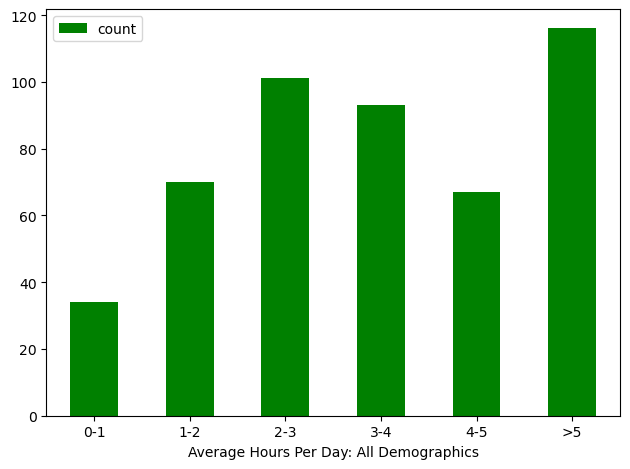

In [47]:
# Create a histogram showing Average Time Per Day distribution
average_time_df.plot(kind='bar', color='green')
plt.xticks(range(len(average_time_df)), average_time_df['avg_time_per_day'], rotation=0)
plt.xlabel("Average Hours Per Day: All Demographics")
plt.tight_layout()
plt.savefig('Average_Hours_Per_Day_All_Demographics.jpg')
plt.show()

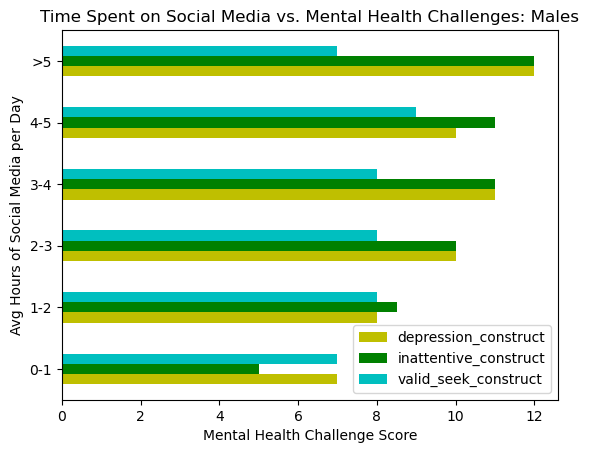

In [48]:
# Time spent on social media vs feelings of depression (groupby male)
males = clean_data_df.loc[clean_data_df['gender']== 'Male']
depressed_male_df = males.groupby(['avg_time_per_day']).median(numeric_only=True)
depressed_male_df = pd.DataFrame(depressed_male_df)
depressed_male_df

depressed_male_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                      title= 'Time Spent on Social Media vs. Mental Health Challenges: Males',
                                                      color=["y", "g", "c"])
plt.savefig('Male_Mental_Health_Barchart.jpg')
plt.show()


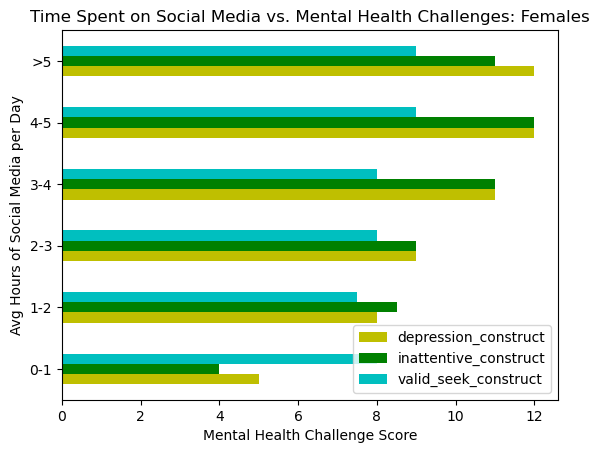

In [49]:
#Avg time spent on sm vs feelings of depression (groupby female)

# Time spent on social media vs feelings of depression (groupby female)
females = clean_data_df.loc[clean_data_df['gender']== 'Female']
depressed_female_df = females.groupby(['avg_time_per_day']).median(numeric_only=True)
depressed_female_df = pd.DataFrame(depressed_female_df)
depressed_female_df

depressed_female_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                     title= 'Time Spent on Social Media vs. Mental Health Challenges: Females',
                                                     color=["y", "g", "c"])
plt.savefig('Female_Mental_Health_Barchart.jpg')
plt.show()